Consider the Motor Trend Car Road Tests (mtcars) dataset provided on GitHub - https://github.com/Accelerate-AI/UnsupervisedLearning_Clustering/tree/main/DailyQuestions/mtcars.csv 

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and different aspects of automobile design and performance for few automobiles.

Some of the feature descriptions are as follows:
mpg  -Miles/(US) gallon
cyl  -Number of cylinders
disp  -Displacement (cu.in.)
hp  -Gross horsepower
drat  -Rear axle ratio
wt  -Weight (lb/1000)
qsec  -1/4 mile time
vs  -Engine (0 = V-shaped, 1 = straight)
am  -Transmission (0 = automatic, 1 = manual)
gear  -Number of forward gears
carb  -Number of carburetors
fast  - Either 1 or 0
Cars & Carname - Name/Model of the Car

Build a dendrogram with any type of linkage method (simple or ward or complete etc.)

Give an inference about which set of car make are similar and clustered together (any one example should suffice)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load data
df = pd.read_csv('mtcars.csv')
df = df.drop('cars', axis=1)
df = df.set_index('carname')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast
carname,,,,,,,,,,,,
Mazda RX4,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1
Mazda RX4 Wag,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1
Datsun 710,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1
Hornet 4 Drive,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1
Valiant,4.254409,6,225.0,105,2.76,3.460,20.22,1,0,3,1,1
Duster 360,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0
Merc 240D,4.939636,4,146.7,62,3.69,3.190,20.00,1,0,4,2,1
Merc 230,4.774935,4,140.8,95,3.92,3.150,22.90,1,0,4,2,1


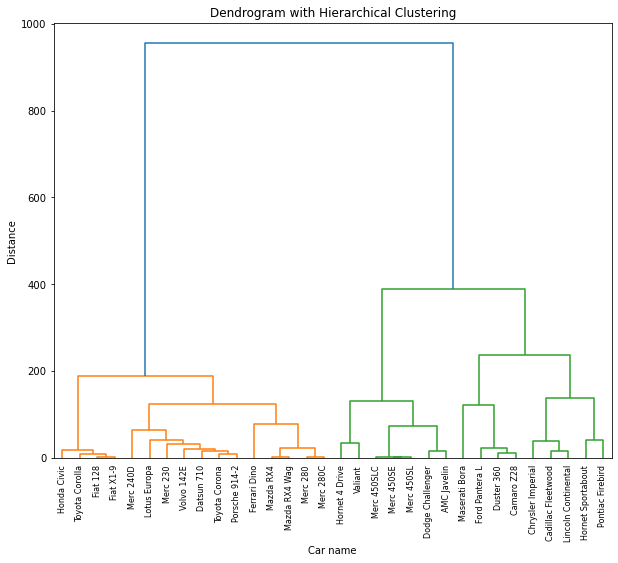

In [3]:
# Calculate distance between each sample
Z = linkage(df, 'ward')

# Plot size
plt.figure(figsize=(10,8))

# Plot title
plt.title("Dendrogram with Hierarchical Clustering")

# Labels
plt.xlabel('Car name')
plt.ylabel('Distance')

# Dendrogram
dn = dendrogram(Z, labels=df.index, leaf_rotation=90)

**(Merc 280, Merc 280C) can form one cluster and similarly (Toyota Corona, Porsche 914-2) can form another cluster**